In [8]:
import requests
import numpy as np
from matplotlib import pyplot as plt
import json

def draw_countries(to_plot):
    data = np.array(to_plot)
    x, y = data.T
    plt.scatter(x, y)
    plt.show()

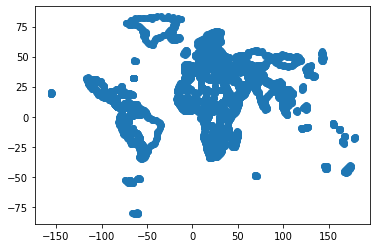

In [9]:
uri = 'http://127.0.0.1:8000/all_geometries'
res = requests.get(uri)
countries_data = res.json()
to_plot = []
for i in range(len(countries_data['features'])):
    if countries_data['features'][i]['geometry']['type'] == 'Polygon':
        to_plot += (countries_data['features'][i]['geometry']['coordinates'][0])
    else:
        to_plot += (countries_data['features'][i]['geometry']['coordinates'][0][0])

data = np.array(to_plot)
# data = np.array(to_plot[:70])
x, y = data.T
plt.scatter(x, y)
plt.show()


In [27]:
def iso_code():
    url = 'http://127.0.0.1:8000/iso_code'
    countries = ["France", "Germany", "Spain", "Italy", "Angola", "Burundi", "Switzerland", "Belarus"]
    details = True
    limit = 5
    offset = 0
    data = []
    for i in range(0,len(countries), limit):
        payload = json.dumps({"countries": countries, "details": details, "limit": 5, "offset": i})
        res = requests.post(url, data=payload)
        countries_data = res.json()
        data += res.json()['data']
    to_plot = []
    for d in data:
        if d['geometry']['type'] == 'Polygon':
            to_plot += (d['geometry']['coordinates'][0])
        else:
            to_plot += (d['geometry']['coordinates'][0][0])
    draw_countries(to_plot)

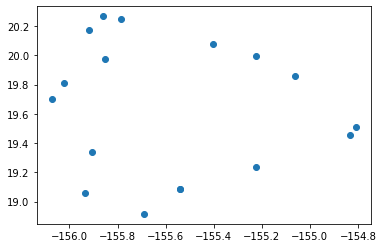

In [28]:
iso_code()